# A1.6 Regresión no lineal
## Luis Enrique Garcia Gallegos
### **Matricula**: 649247
En esta actividad trabajaremos con una base de datos que generé en el semestre de Otoño 2022 en mi clase de Sistemas Digitales en la Universidad de Monterrey. En dicha materia, cada semana se entregan actividades y la bandeja de entrega se cierra cada domingo a medianoche. Con mi experiencia impartiendo esta clase, tengo la sospecha de que entre más cerca de la hora de cierre de la bandeja se entrega la tarea, peor la calificación en la misma. Ayúdame a confirmar o rechazar mi hipótesis. 
Utilizaremos el archivo de nombre `Tiempo_de_Entrega.csv`, donde podrás encontrar información para **432** actividades entregadas, organizadas de la siguiente manera:

* `Tiempo`. Tiempo restante para que se cerrara la bandeja, en horas. Es decir, un **1** indica que entregaron la actividad el domingo a las 11:00 p.m., y un **48** indica que entregaron la actividad 48 horas antes del domingo a medianoche. 
* `Calificacion`. Calificación obtenida, en una escala entre el **0** y el **110**. 

Desarrolla los siguientes puntos en una *Jupyter Notebook*, tratando, dentro de lo posible, que cada punto se trabaje en una celda distinta. Los comentarios en el código siempre son bienvenidos, de preferencia, aprovecha el *markdown* para generar cuadros de descripción que ayuden al lector a comprender el trabajo realizado.
1. Importa los datos del archivo `Tiempo_de_Entrega.csv` a tu ambiente de trabajo. Este archivo lo encontrarás en la misma página donde descargaste esta plantilla. Genera una gráfica de dispersión que muestre el comportamiento de los datos. Agrega una línea de texto en la que generes una predicción sobre qué tipo de algoritmo será el más adecuado para resolver la tarea (no hay respuestas correctas). 
- **NOTA**: Si te encuentras con algo **raro**, te recomiendo que abras el archivo csv en Excel o alguna herramienta similar y revises qué podría estar causando el error. Cuando lo encuentres, toma alguna acción al respecto para solucionar el problema, e indica en la celda de la libreta la acción que tomaste y el por qué. No se evaluará la acción realizada, pero servirá para discusión en clase.

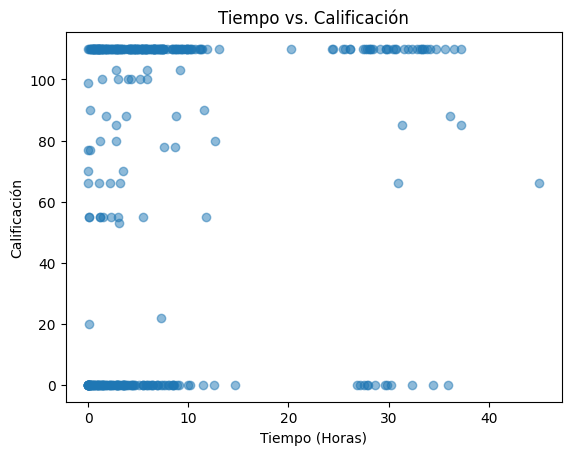

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
datos=pd.read_csv('Tiempo_de_Entrega.csv')
datos=datos.dropna(subset=['Tiempo'])
datos=datos.fillna({'Calificacion': datos['Calificacion'].mode()[0]})
q1=datos.Tiempo.quantile(0.25)
q3=datos.Tiempo.quantile(0.75)
riq=q3-q1
limA=0
limB=q3+(3*riq)
datos=datos[(datos.Tiempo>=limA)&(datos.Tiempo<=limB)]
datos['Calificacion']=datos['Calificacion'].apply(lambda x: 0 if not str(x).isdigit() else int(x))
plt.scatter(datos.Tiempo, datos.Calificacion, alpha=0.5)
plt.title('Tiempo vs. Calificación')
plt.xlabel('Tiempo (Horas)')
plt.ylabel('Calificación')
%matplotlib inline

Primero se limpiaron los datos, eliminando los datos huecos (aquellos que no tuvieran nada en `Tiempo` y en `Calificacion`), despues se uso el **método de Tukey** eliminar los valores atípicos del `Tiempo` y por ultimo se remplazaron los valores que no fueran númericos por **0** en `Calificacion`.

2. Separa los datos en entrenamiento y prueba, con una relación de **70/30**. Imprime en consola el promedio de los tiempos en el conjunto de entrenamiento y en el conjunto de prueba. Haz lo mismo para las calificaciones. Incluye una línea de texto donde comentes sobre la similitud o diferencia de los valores promedio entre el conjunto de entrenamiento y el de validación, y cómo es que esto podría afectar al análisis.

In [7]:
random.seed(0)
XC, XP, YC, YP = train_test_split(datos.Tiempo, datos.Calificacion, train_size=0.7)
print("Tiempo:\n\tPromedio de entrenamiento: ", round(np.mean(XC), 3), "\tPromedio de prueba: ", round(np.mean(XP), 3))
print("Calificaciones:\n\tPromedio de entrenamiento: ", round(np.mean(YC), 3), "\tPromedio de prueba: ", round(np.mean(YP), 3))
n=len(XP)

Tiempo:
	Promedio de entrenamiento:  7.924 	Promedio de prueba:  7.415
Calificaciones:
	Promedio de entrenamiento:  68.894 	Promedio de prueba:  69.316


Se nota una leve diferencia en los promedios, es decir que va a existir variaciones entre nuestros los resultados con los de prueba.

3. Entrena un modelo de regresión polinomial usando los datos de entrenamiento; puedes usar el orden de polinomial que consideres más adecuado. Imprime un resumen de los resultados obtenidos y agrega una línea de texto en la que comentes sobre el tipo de relación (positiva o negativa; ¿a menor tiempo menor calificación?) entre el término lineal y la respuesta, lo que esto significa y si dicha variable está significativamente asociada con las calificaciones. 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     6.072
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           0.000110
Time:                        07:09:09   Log-Likelihood:                -1397.4
No. Observations:                 263   AIC:                             2805.
Df Residuals:                     258   BIC:                             2823.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             42.7784      7.538      5.675      0.0

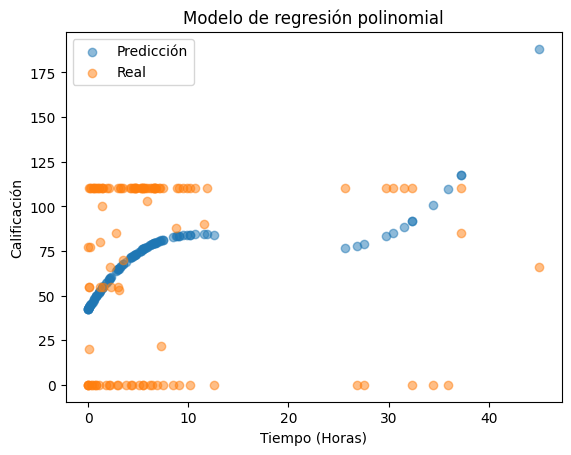

In [8]:
grado=PolynomialFeatures(degree=4)
XCPoly=grado.fit_transform(np.array(XC).reshape(-1, 1))
XPPoly=grado.transform(np.array(XP).reshape(-1, 1))
XCAdj=pd.DataFrame(XCPoly)
XPAdj=pd.DataFrame(XPPoly)
modeloRP=sm.OLS(list(YC),XCAdj).fit()
print(modeloRP.summary())
estimacionRP=modeloRP.predict(sm.add_constant(XPPoly))
mseRP=mean_squared_error(estimacionRP, YP)
plt.scatter(XP, estimacionRP, alpha=0.5)
plt.scatter(XP, YP, alpha=0.5)
plt.title('Modelo de regresión polinomial')
plt.xlabel("Tiempo (Horas)")
plt.ylabel("Calificación")
plt.legend(["Predicción", "Real"])
plt.show()
%matplotlib inline

Este modelo nos permite ver que puede existir una relación entre nuestros datos, es decir que entre mas tiempo se le dedique a la tarea se puede obtener mejor calificación, sin embargo también es importante ver que en cierto tiempo esto es ineficiente.

4. Entrena un modelo de regresión segmentada, siguiendo la misma estrategia utilizada en la lectura interactiva, utilizando regresiones cuadráticas para cada segmento. Genera estimaciones (predicciones) en los datos de validación. Asegúrate de usar la función descrita en la lectura interactiva, instalándola en tu ambiente de trabajo en caso de no haberlo hecho previamente.

c:\Users\kikin\OneDrive\UDEM\4° Semestre\Inteligencia artificial I\.venv\Lib\site-packages\statsmodels\tsa\tsatools.py:162: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  x = pd.concat(x[::order], axis=1)
c:\Users\kikin\OneDrive\UDEM\4° Semestre\Inteligencia artificial I\.venv\Lib\site-packages\statsmodels\tsa\tsatools.py:162: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  x = pd.concat(x[::order], axis=1)


	Segmento <= 20.39673611 
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     7.578
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           0.000655
Time:                        07:09:10   Log-Likelihood:                -1201.3
No. Observations:                 225   AIC:                             2409.
Df Residuals:                     222   BIC:                             2419.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             45.3930    

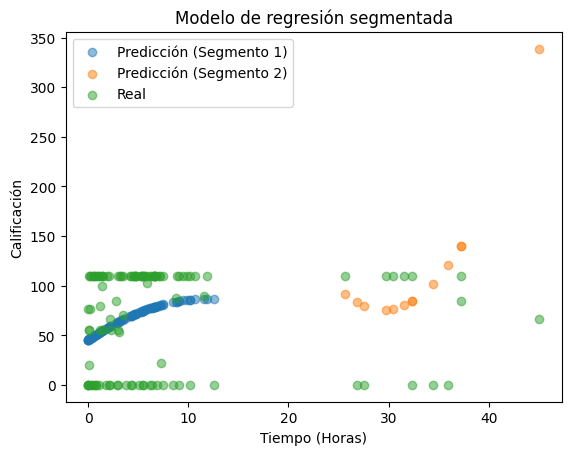

In [9]:
corte=(((XC.min()+XP.min())/2)+((XC.max()+XP.max())/2))/2
XCSegA=XC[(XC<=corte)]
XCSegB=XC[(XC>corte)]
XPSegA=XP[(XP<=corte)]
XPSegB=XP[(XP>corte)]
YCSegA=YC[(XC<=corte)]
YCSegB=YC[(XC>corte)]
YPSegA=YP[(XP<=corte)]
YPSegB=YP[(XP>corte)]
grado=PolynomialFeatures(degree=2)
XCSegA=grado.fit_transform(np.array(XCSegA).reshape(-1, 1))
XPSegA=grado.transform(np.array(XPSegA).reshape(-1, 1))
XCAdjSegA=pd.DataFrame(XCSegA)
XPAdjSegA=pd.DataFrame(XPSegA)
modeloSegA=sm.OLS(list(YCSegA),XCAdjSegA).fit()
XCSegB=grado.fit_transform(np.array(XCSegB).reshape(-1, 1))
XPSegB=grado.transform(np.array(XPSegB).reshape(-1, 1))
XCAdjSegB=pd.DataFrame(XCSegB)
XPAdjSegB=pd.DataFrame(XPSegB)
modeloSegB=sm.OLS(list(YCSegB),XCAdjSegB).fit()
estimacionSegA=modeloSegA.predict(sm.add_constant(XPAdjSegA))
mseSegA=mean_squared_error(estimacionSegA, YP[(XP<=corte)])
estimacionSegB=modeloSegB.predict(sm.add_constant(XPAdjSegB))
mseSegB=mean_squared_error(estimacionSegB, YP[(XP>corte)])
print("\tSegmento <=", corte, "\n",modeloSegA.summary())
print("\tSegmento >", corte, "\n",modeloSegB.summary())
plt.scatter(XP[(XP<=corte)], estimacionSegA, alpha=0.5)
plt.scatter(XP[(XP>corte)], estimacionSegB, alpha=0.5)
plt.scatter(XP, YP, alpha=0.5)
plt.title('Modelo de regresión segmentada')
plt.xlabel("Tiempo (Horas)")
plt.ylabel("Calificación")
plt.legend(["Predicción (Segmento 1)", "Predicción (Segmento 2)", "Real"])
plt.show()


Para hacer un modelo de regresión se usar la función `PiecewiseRegressor` de la librería **mlinsights.mlmodel**, no obstante esto no lo hice porque según la terminal de **anaconda** al tratar de descargar la librería existe un problema y es la versión de python (*3.12*), siendo una version que no esta adaptada a la librería por lo que no se recomienda usar versiones anteriores de python (*3.10 para abajo*). Se dividieron los datos entre dos intervalos los cuales serán un punto medio entre nuestros valores, por lo que se entrenaron **2 modelos** que abarcaron distintos intervalos.

5. Entrena un modelo **KNN** para regresión utilizando el valor de `k` que consideres adecuado (o prueba con varios). Genera estimaciones en los datos de validación. 

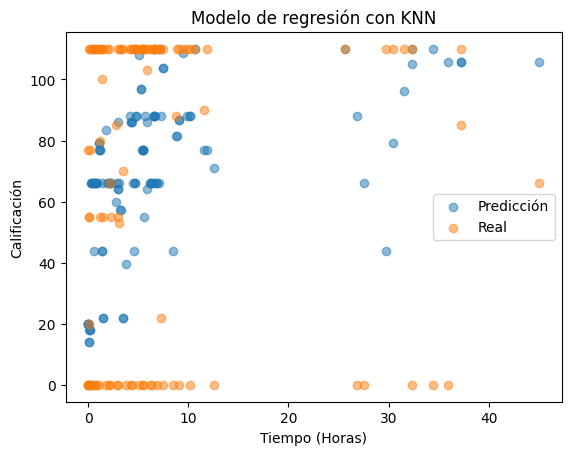

In [10]:
escala=StandardScaler()
XCEscala=escala.fit_transform(np.array(XC).reshape(-1, 1))
XPEscala=escala.transform(np.array(XP).reshape(-1, 1))
mse_scores={}
for k in range(1, 11):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(XCEscala, YC)
    y_pred=knn.predict(XPEscala)
    mse_scores[k]=mean_squared_error(list(YP), y_pred)
best_k=min(mse_scores, key=mse_scores.get)
modeloKNN=KNeighborsRegressor(n_neighbors=best_k)
modeloKNN.fit(XCEscala, YC)
estimacionKNN=modeloKNN.predict(XPEscala)
mseKNN=mean_squared_error(estimacionKNN, YP)
plt.scatter(XP, estimacionKNN, alpha=0.5)
plt.scatter(XP, YP, alpha=0.5)
plt.title('Modelo de regresión con KNN')
plt.xlabel("Tiempo (Horas)")
plt.ylabel("Calificación")
plt.legend(["Predicción", "Real"])
plt.show()

El modelo **KNN** nos permite aproximarnos a un resultado acorde con los datos de entrenamiento, es decir que este modelo llega a ser más flexible con los resultados.

6. Calcula el `RSE` en los datos de prueba para los **3 modelos** y agrega una línea de texto donde comentes sobre sus diferencias y si hay un claro ***ganador***. No te bases exclusivamente en el error, puedes considerar también aspectos como la interpretabilidad del modelo.

In [11]:
rseRP=np.sqrt(mseRP*n/(n-2))
rseSeg=np.sqrt(((mseSegA+mseSegB)/2)*n/(n-2))
rseKNN=np.sqrt(mseKNN*n/(n-2))
print("RSE Polinomial: ", round(rseRP, 3), "\tRSE Segmentado: ", round(rseSeg, 3), "\tRSE KNN: ", round(rseKNN, 3))

RSE Polinomial:  51.286 	RSE Segmentado:  78.696 	RSE KNN:  53.368


Tanto el modelo **polinomial** como el **segmentado**, tienen `RSE`s similares, mientras que el **KNN** varia un poco más. En lo personal me quedaría con el modelo **KNN**, porque nos permite ver que tan bien nos podria ir dependiendo de los valores de entrenamiento, por lo que yo usaria este modelo como predicción para ver cuanto tiempo le dedicaria a la tarea, sin la necesidad de pensar que si le dedico un poco más tiempo la calificación sera menor.

7. Para los datos de prueba, gráfica tanto las calificaciones reales como las predichas por los **3 modelos** en un mismo `plot`, asegurándote de utilizar etiquetas, colores y/o distintos marcadores para diferenciar y describir a cada modelo.

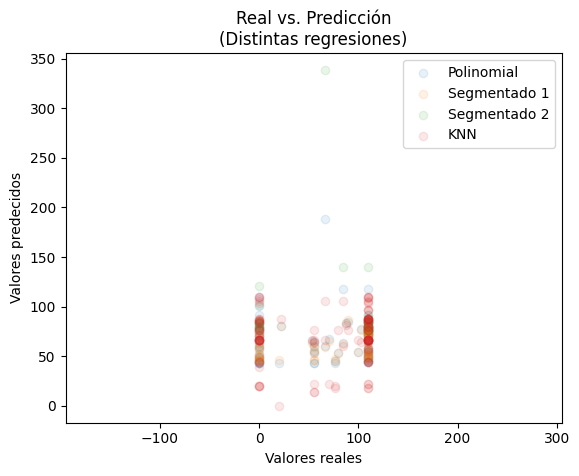

In [12]:
plt.scatter(YP, estimacionRP, alpha=0.1)
plt.scatter(YPSegA, estimacionSegA, alpha=0.1)
plt.scatter(YPSegB, estimacionSegB, alpha=0.1)
plt.scatter(YP, estimacionKNN, alpha=0.1)
plt.title('Real vs. Predicción\n(Distintas regresiones)')
plt.xlabel("Valores reales")
plt.ylabel("Valores predecidos")
plt.legend(["Polinomial", "Segmentado 1", "Segmentado 2", "KNN"])
plt.axis('equal')
plt.show()

Si bien no tenemos un modelo que formara una recta a **45°**, vemos que nuestros modelos obtuvieron similares resultados para un mismo conjunto de entrenamiento y de prueba, debido a que si hiciéramos varias particiones de entrenamientos y pruebas obtendríamos modelos muy distintos ya que puede ser que se tomen datos a muy similares y muy distintos.

**Firma de Honor:** Doy mi palabra que he realizado esta actividad con integridad académica